In [6]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import seaborn as sns

Las probabilidades de pago potenciales (payout) en la ruleta se expresan en forma de x a 1, lo que significa que ganará x dólares por cada dólar que apueste. Por ejemplo, una apuesta de un solo número ofrece un pago de 35 a 1. Por lo tanto, si gana, recibirá su dólar más $ 35.

¿Cómo se calculan los pagos de la ruleta? En su apuesta específica, divida el número 36 por el número de cuadrados que cubre su apuesta. Luego reste 1 de esa cifra, para obtener las probabilidades de pago. Por ejemplo, una apuesta de tres números significa dividir 36 entre 3 para obtener 12, luego restar 1 para igualar 11. La tasa de pago para una apuesta de tres números es, por lo tanto, de 11 a 1, por lo que si apuesta 10 en esta apuesta, una ganancia vale un Pago de 110.

Si la probabilidad de ganar es p y la de perder es 1-p, si apuesto 1 entonces en promedio espero ganar $$p 1 - 1(1-p)$$

https://www.online-casinos.com/roulette/strategy/

## Random walk

Estrategia en la que tengo una posibilidad *p* de ganar y una *1-p* de perder. Por ejemplo apostar al rojo, al negro, a par o impar, todas tienen una probabilidad p = 18/37 de suceder en una ruleta europea(18/38 en una americana, 18/36 en una justa)

In [7]:
def randomwalk(cost, start, winp, N):
    output = np.zeros(N)
    running_sum = start

    for i in range(N):
        running_sum -= cost
        if rn.random() < winp:
            running_sum += 1
        output[i] = running_sum

    return output

Only 31.5% of bettors have postive resutls after 200 bets
The average result of 500 bets is a loss of 6.125 dollars


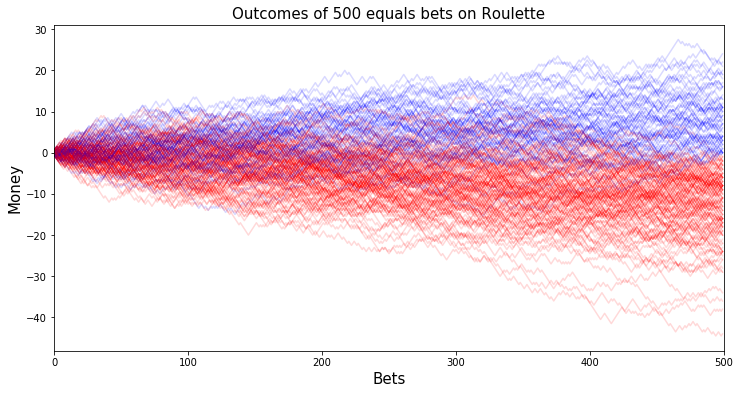

In [8]:
plt.figure(figsize=(12,6))

wins = 0.0
simulations = 200
cum_sum_of_sims = 0

for num in range(simulations):
    result = randomwalk(0.5, 0, 18.0/37, 500)
    cum_sum_of_sims += result[-1]
    if result[-1] < 0:
        plt.plot(result, 'r', alpha = .15)
    else:
        wins += 1
        plt.plot(result, 'b', alpha = .15)

win_percent = 100*wins/simulations
avg_loss = -1.0*cum_sum_of_sims/simulations

print("Only {}% of bettors have postive resutls after {} bets".format(win_percent, simulations))
print("The average result of 500 bets is a loss of {} dollars".format(avg_loss))

plt.title('Outcomes of 500 equals bets on Roulette', fontsize=15)
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.xlim(0, 500)
plt.savefig('roulette_random_walk.pdf', bbox_inches='tight')
plt.show()

In [9]:
def gamble(start_money, bet_size, winp, num_bets,):
    output = np.zeros(num_bets)
    money = start_money

    for i in range(num_bets):
        if money < 0:
            break
        elif rn.random() < winp:
            money += bet_size
        else:
            money -= bet_size

        output[i] = money

    return output

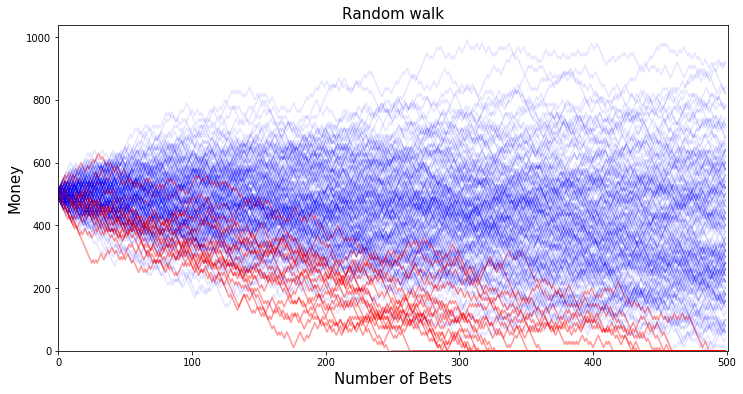

After 500 bets, 27.0% of bettors won money
64.0% of bettors lost money
9.0% of bettors went broke


In [10]:
plt.figure(figsize=(12,6))

wins = 0.0
loss = 0.0
simulations = 200

for num in range(simulations):
    result = gamble(500, 10, 18.0/37, 500)
    cum_sum_of_sims += result[-1]
    if min(result) < 0:
        loss += 1
        plt.plot(result, 'r', alpha = .4)
    else:
        plt.plot(result, 'b', alpha = .1)
        if result[-1] > 500:
            wins += 1

plt.title('Random walk', fontsize=15)
plt.xlabel('Number of Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.xlim(0, 501)
plt.ylim(0, )
plt.show()


print("After 500 bets, {}% of bettors won money".format(100.0*wins/simulations))
print("{}% of bettors lost money".format(100.0*(simulations-wins-loss)/simulations))
print("{}% of bettors went broke".format(100.0*loss/simulations))

## Martingale

In [11]:
money = 500
table_limit = 1024
bet_size = 1
num_bets = 2500
winp = 18.0/37

In [263]:
def martingale(start_money, start_amount, table_limit, winp, num_bets):
    bet_size = np.min((start_amount, start_amount))
    money = start_money
    output = np.zeros(num_bets+1)

    output[0] = start_money
    for i in range(1,num_bets+1):
        if money <= 0:
            break
        elif rn.random() < winp:
            money += bet_size
            bet_size = 1
        else:
            money -= bet_size
            bet_size = np.min((2 * bet_size, table_limit))
            if bet_size > money:
                bet_size = money

        output[i] = money

    return output

### Martingale a largo plazo

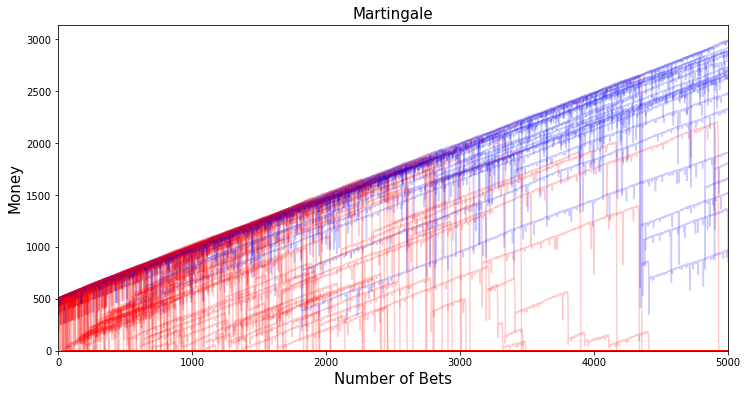

After 5000 bets, 89.5% of bettors lost all their money
Avg money won/lost in 200 simulations $-250.57


In [267]:
plt.figure(figsize=(12,6))

loss = 0
simulations = 200
last_balances = np.zeros(simulations)
money = 500
num_bets = 5000
start_amount = 5

for num in range(simulations):
    result = martingale(money, start_amount, table_limit, winp, num_bets)

    if min(result) <= 0:
        loss += 1
        plt.plot(result, 'r', alpha = .20)
    else:
        plt.plot(result, 'b', alpha = .20)
        
    #Calculate expected return of investment (ROI)
    last_balances[num] = result[-1] - money

plt.title('Martingale', fontsize=15)
plt.xlabel('Number of Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.xlim(0, num_bets)
plt.ylim(0, )
plt.savefig('outcome.pdf', bbox_inches='tight')
plt.show()


print("After 5000 bets, {}% of bettors lost all their money".format(100.0*loss/simulations))
print("Avg money won/lost in 200 simulations ${}".format(last_balances.mean()))

### Martingale a corto plazo

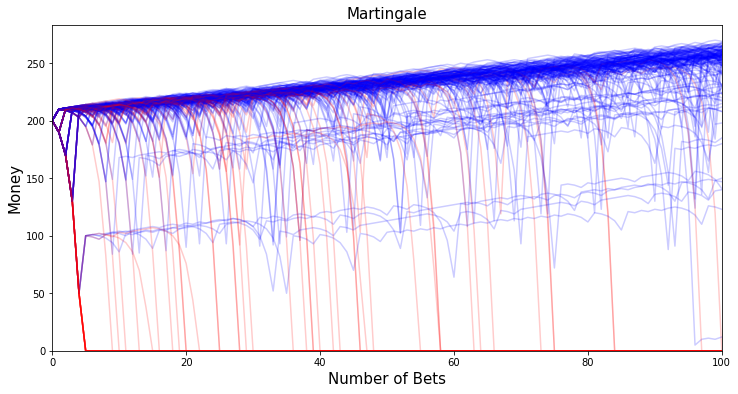

After 200 bets, 28.5% of bettors lost all their money
Avg money won/lost in 200 simulations $-24.685
Closing balance $-4937.0


In [330]:
plt.figure(figsize=(12,6))

loss = 0
simulations = 200
last_balances = np.zeros(simulations)
num_bets = 100
start_amount = 10
money = 200

for num in range(simulations):
    result = martingale(money, start_amount, table_limit, winp, num_bets)
    if min(result) <=0 :
        loss += 1
        plt.plot(result, 'r', alpha = .20)
    else:
        plt.plot(result, 'b', alpha = .20)
    
    #Calculate expected return of investment (ROI)
    last_balances[num] = result[-1] - money

plt.title('Martingale', fontsize=15)
plt.xlabel('Number of Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.xlim(0, num_bets)
plt.ylim(0, )
plt.savefig('outcome.pdf', bbox_inches='tight')
plt.show()


print("After 200 bets, {}% of bettors lost all their money".format(100.0*loss/simulations))
print("Avg money won/lost in 200 simulations ${}".format(last_balances.mean()))
print("Closing balance ${}".format(last_balances.sum()))

## Fibonacci

## Paroli - Positive progression

In [248]:
def paroli(start_money, start_amount, table_limit, winp, num_bets):
    bet_size = np.min((start_amount, start_money))
    money = start_money
    output = np.zeros(num_bets+1)

    output[0] = start_money
    for i in range(1,num_bets+1):
        if money <= 0:
            break
        elif rn.random() < winp:
            money += bet_size
            bet_size = np.min((2 * bet_size, table_limit))
            if i%3 == 0:
                bet_size = start_amount
        else:
            money -= bet_size
            bet_size = start_amount

        output[i] = money

    return output

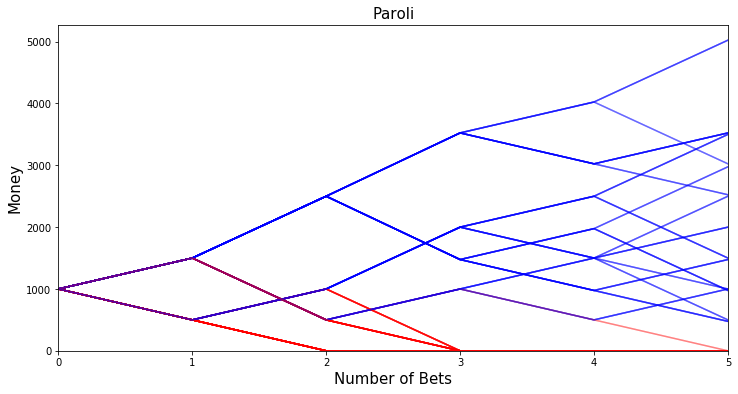

After 200 bets, 50.0% of bettors lost all their money
Avg money won/lost in 200 simulations $67.26 per simulation
Closing balance $13452.0


In [373]:
plt.figure(figsize=(12,6))

loss = 0
simulations = 200
last_balances = np.zeros(simulations)
num_bets = 5
start_amount = 500
money = 1000

for num in range(simulations):
    result = paroli(money, start_amount, table_limit, winp, num_bets)
    if min(result) <= 0 :
        loss += 1
        plt.plot(result, 'r', alpha = .20)
    else:
        plt.plot(result, 'b', alpha = .20)
    
    #Calculate expected return of investment (ROI)
    last_balances[num] = result[-1] - money

plt.title('Paroli', fontsize=15)
plt.xlabel('Number of Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.xlim(0, num_bets)
plt.ylim(0, )
plt.savefig('paroli.pdf', bbox_inches='tight')
plt.show()


print("After 200 bets, {}% of bettors lost all their money".format(100.0*loss/simulations))
print("Avg money won/lost in 200 simulations ${} per simulation".format(last_balances.mean()))
print("Closing balance ${}".format(last_balances.sum()))